In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [86]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')


In [87]:
low_test_dir="RealImages/"

In [88]:
# Get the list of all the high light images
try:
    low_image_file = os.listdir(low_test_dir)
    print(low_image_file)  # This will print the list of file names in the directory
except Exception as e:
    print("Error in getting the list of high image files:", e)

['low12.jpg', 'low13.jpg', 'low2.jpg', 'low3.jpg', 'low4.jpg', 'low5.jpg', 'low6.jpg', 'low7.jpg', 'low8.jpg', 'low9.jpg', 'testing_live8.jpg']


In [89]:
low_light_images = []  # Initialize a list to store the loaded low light images



for file_name in low_image_file:
    file_path = os.path.join(low_test_dir, file_name)  # Construct the absolute file path
    image = cv2.imread(file_path)  # Read the image using OpenCV
    if image is not None:  # Check if the image was successfully loaded
        low_light_images.append(image)  # Append the loaded image to the list
    else:
        print(f"Failed to load image from path: {file_path}")

In [90]:
new_image_size = (256, 256)

# Define a function to resize the images 
def resize_image(image, new_image_size):
    return cv2.resize(image, new_image_size)

In [91]:
# Resize all the low light images
low_light_images_resized = [resize_image(image, new_image_size) for image in low_light_images]

Text(0.5, 1.0, 'Low Light Image')

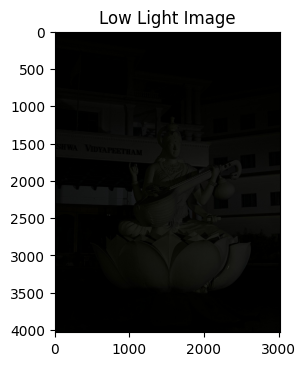

In [92]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(low_light_images[2],cv2.COLOR_BGR2RGB))
plt.title("Low Light Image")

In [93]:
def normalize_image(image):
    return image / 255.0

In [94]:
# Normalize all the low light images
low_light_images_normalized = [normalize_image(image) for image in low_light_images_resized]

In [95]:
test_low = np.array(low_light_images_normalized)

In [96]:
print("Shape of the test low light images:", test_low.shape)

Shape of the test low light images: (11, 256, 256, 3)


In [97]:
predictions = model.predict(test_low)
predictions.shape

1/1 [==============================] - 0s 262ms/step


(11, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


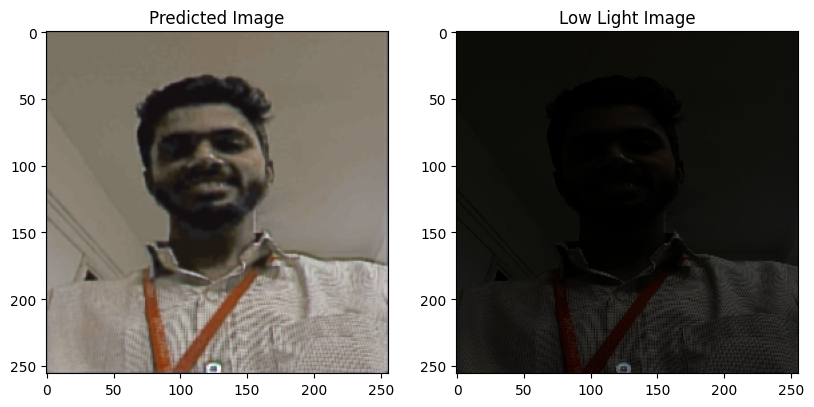

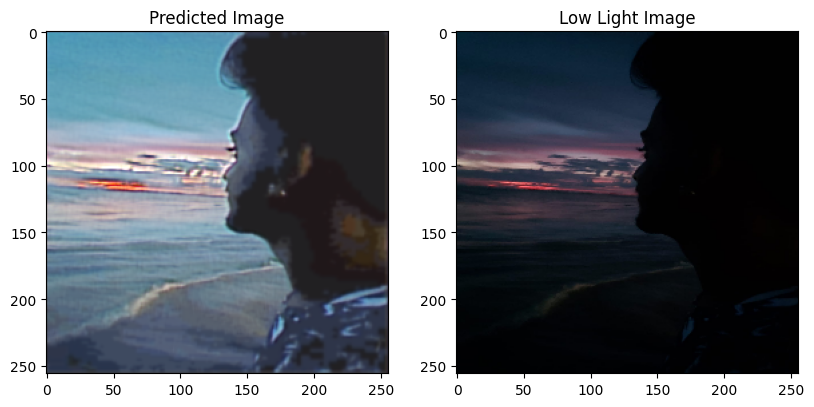

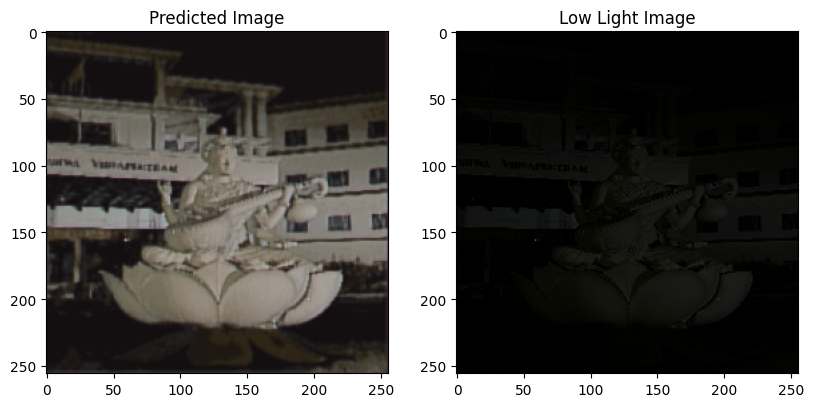

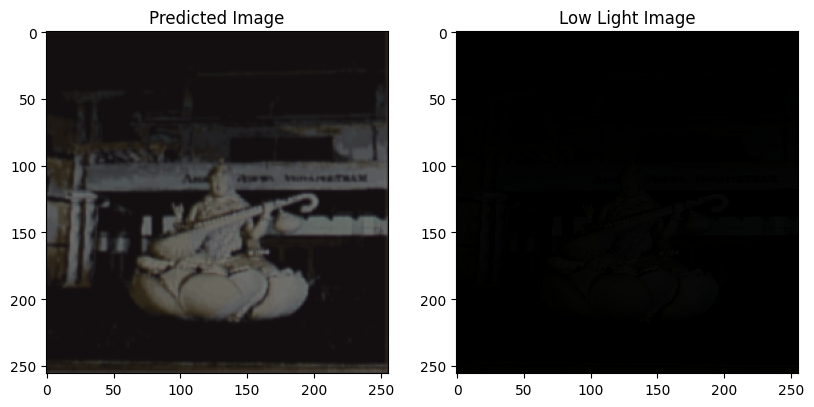

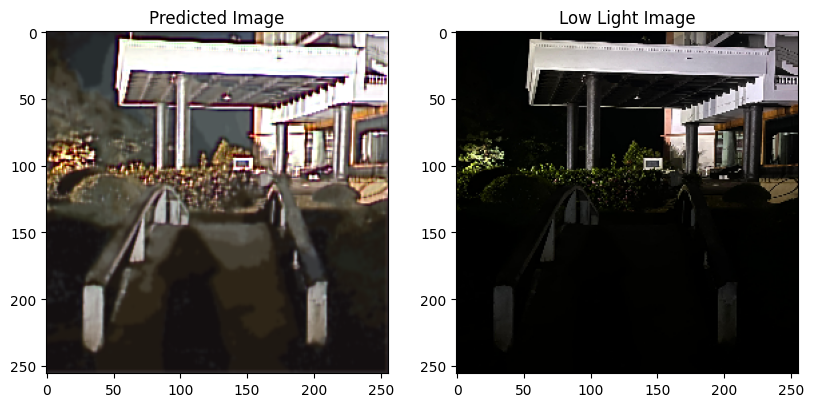

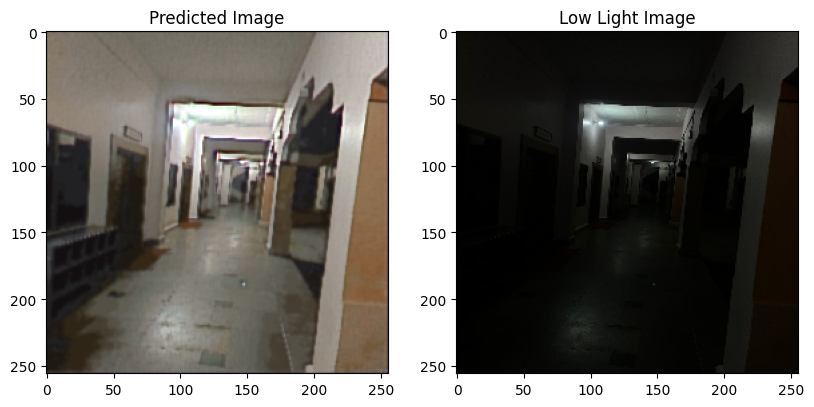

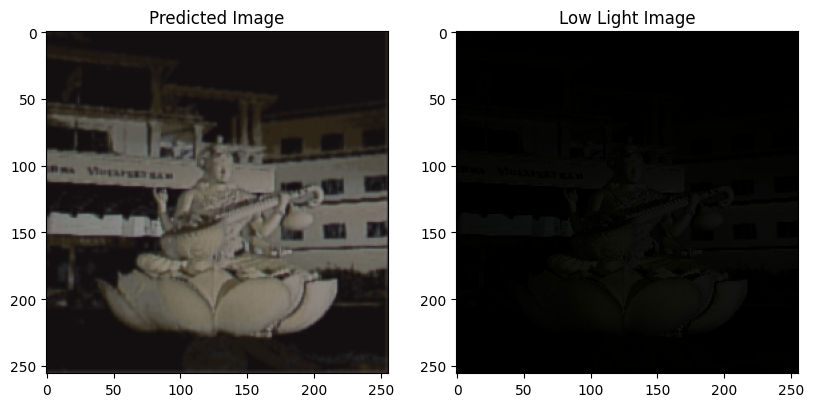

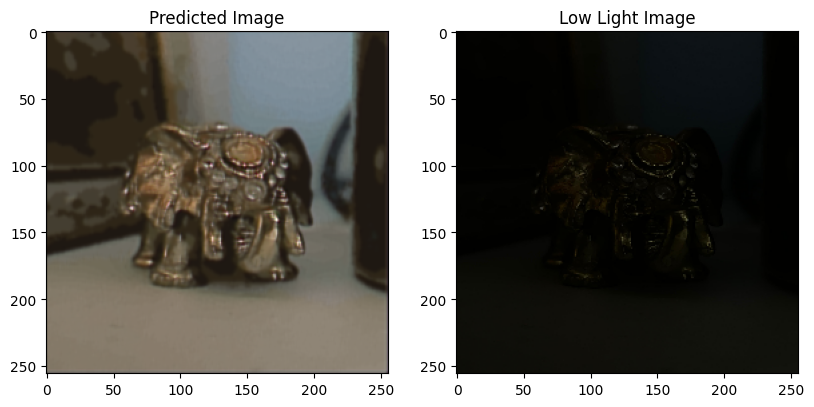

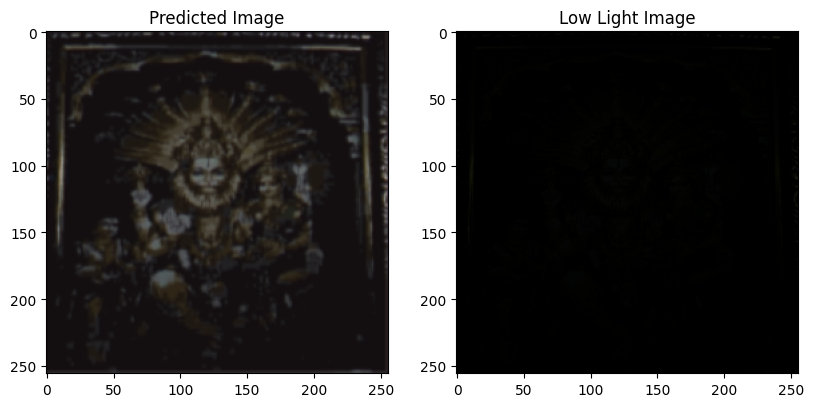

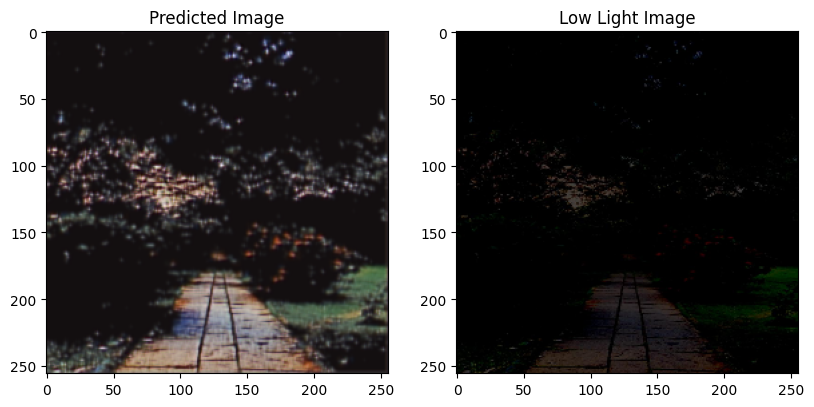

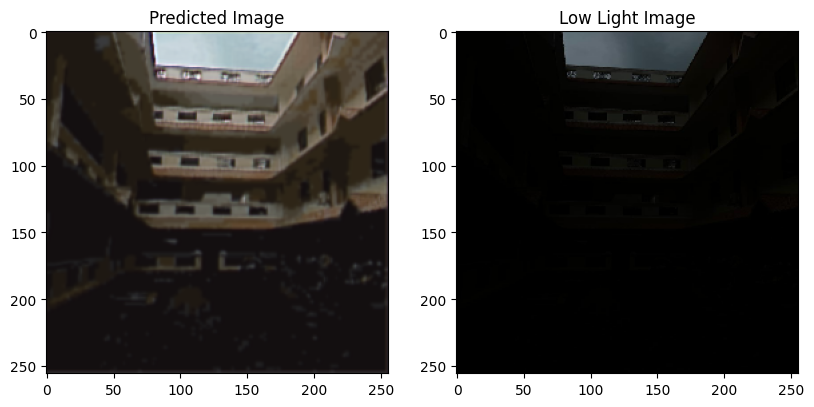

In [98]:
for i in range(0, len(test_low)):

    plt.figure(figsize=(15, 15))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(predictions[i], cv2.COLOR_BGR2RGB))
    plt.title("Predicted Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(low_light_images_resized[i], cv2.COLOR_BGR2RGB))
    plt.title("Low Light Image")